# Lines and Annotations


Draw lines defined by a set of anchor-points and add some nice annotations.

Connect the anchor-points via:

- geodesic lines
- straight lines
- reprojected straight lines defined in a given projection


(requires EOmaps >= v4.3.1)


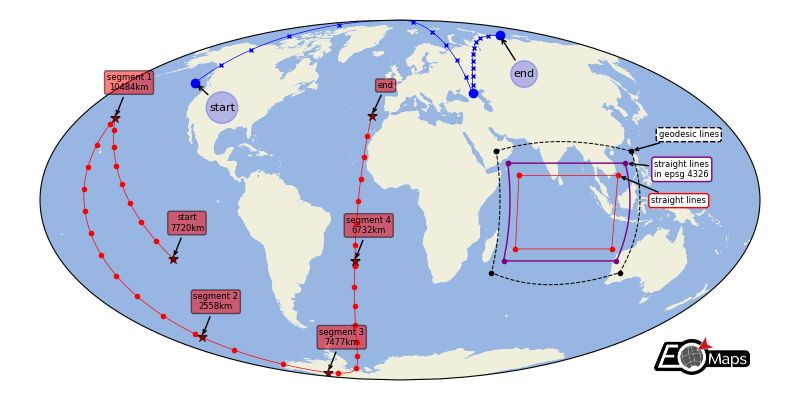

In [1]:
# EOmaps example: drawing lines on a map

from eomaps import Maps

m = Maps(Maps.CRS.Mollweide(), figsize=(8, 4))
m.add_feature.preset.ocean()
m.add_feature.preset.land()

# get a few points for some basic lines
l1 = [(-135, 50), (45, 45), (123, 76)]
l2 = [(-120, -24), (-160, 34), (-153, -60), (-128, -82), (-24, -25), (-16, 35)]

# define annotation-styles
bbox_style1 = dict(
    xy_crs=4326,
    fontsize=8,
    bbox=dict(boxstyle="circle,pad=0.25", ec="b", fc="b", alpha=0.25),
)
bbox_style2 = dict(
    xy_crs=4326,
    fontsize=6,
    bbox=dict(boxstyle="round,pad=0.25", ec="k", fc="r", alpha=0.5),
    horizontalalignment="center",
)

# -------- draw a line with 100 intermediate points per line-segment,
#          mark anchor-points with "o" and every 10th intermediate point with "x"
m.add_line(l1, c="b", lw=0.5, marker="x", ms=3, markevery=10, n=100, mark_points="bo")

m.add_annotation(xy=l1[0], text="start", xytext=(10, -20), **bbox_style1)
m.add_annotation(xy=l1[-1], text="end", xytext=(10, -30), **bbox_style1)

# -------- draw a line with ~1km spacing between intermediate points per line-segment,
#          mark anchor-points with "*" and every 1000th intermediate point with "."

d_inter, d_tot = m.add_line(
    l2,
    c="r",
    lw=0.5,
    marker=".",
    del_s=1000,
    markevery=1000,
    mark_points=dict(marker="*", fc="darkred", ec="k", lw=0.25, s=60, zorder=99),
)

for i, (point, distance) in enumerate(zip(l2[:-1], d_tot)):
    if i == 0:
        t = "start"
    else:
        t = f"segment {i}"

    m.add_annotation(
        xy=point, text=f"{t}\n{distance/1000:.0f}km", xytext=(10, 20), **bbox_style2
    )

m.add_annotation(xy=l2[-1], text="end", xytext=(10, 20), **bbox_style2)


# -------- show the effect of different connection-styles

l3 = [(50, 20), (120, 20), (120, -30), (50, -30), (50, 20)]
l4 = [(55, 15), (115, 15), (115, -25), (55, -25), (55, 15)]
l5 = [(60, 10), (110, 10), (110, -20), (60, -20), (60, 10)]

# -------- connect points via straight lines
m.add_line(l3, lw=0.75, ls="--", c="k", mark_points="k.")
m.add_annotation(
    xy=l3[1],
    fontsize=6,
    xy_crs=4326,
    text="geodesic lines",
    xytext=(20, 10),
    bbox=dict(ec="k", fc="w", ls="--"),
)

# -------- connect points via lines that are straight in a given projection
m.add_line(
    l4,
    connect="straight_crs",
    xy_crs=4326,
    lw=1,
    c="purple",
    mark_points=dict(fc="purple", marker="."),
)
m.add_annotation(
    xy=l4[1],
    fontsize=6,
    xy_crs=4326,
    text="straight lines\nin epsg 4326",
    xytext=(21, -10),
    bbox=dict(ec="purple", fc="w"),
)

# -------- connect points via geodesic lines
m.add_line(l5, connect="straight", lw=0.5, c="r", mark_points="r.")

m.add_annotation(
    xy=l5[1],
    fontsize=6,
    xy_crs=4326,
    text="straight lines",
    xytext=(24, -20),
    bbox=dict(ec="r", fc="w"),
)

m.add_logo()
m.show()